In [ ]:
import pandas as pd

In [ ]:
df_D = pd.read_csv('/content/deliveries.csv')
df_M = pd.read_csv('/content/matches.csv')
df_PT = pd.read_csv('/content/points_table.csv')

In [ ]:
df_D

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17378,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Use enumerate to iterate over the dataframes and their index
dataframes = [df_D, df_M, df_PT]

for i, df in enumerate(dataframes):
    print(f"DataFrame {i+1} - Name: df_{chr(65+i)}")
    df.info()
    print('\n' + '-'*40 + '\n')


DataFrame 1 - Name: df_A
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17380 non-null  int64  
 1   season                  17380 non-null  object 
 2   start_date              17380 non-null  object 
 3   venue                   17380 non-null  object 
 4   innings                 17380 non-null  int64  
 5   ball                    17380 non-null  float64
 6   batting_team            17380 non-null  object 
 7   bowling_team            17380 non-null  object 
 8   striker                 17380 non-null  object 
 9   non_striker             17380 non-null  object 
 10  bowler                  17380 non-null  object 
 11  runs_off_bat            17380 non-null  int64  
 12  extras                  17380 non-null  int64  
 13  wides                   431 non-null    float64
 14  noballs      

In [ ]:
# Handle missing values
numerical_columns = df_D.select_dtypes(include=['number']).columns
df_D[numerical_columns] = df_D[numerical_columns].fillna(0)

df_D[["wicket_type", "player_dismissed"]] = df_D[["wicket_type", "player_dismissed"]].fillna("no dismissal")

df_D.isna().sum()


match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
dtype: int64

In [ ]:
# Convert date columns to datetime format
df_D['start_date'] = pd.to_datetime(df_D['start_date'])
# Extract month, day, and year from the start_date column
df_D['month'] = df_D['start_date'].dt.month
df_D['day'] = df_D['start_date'].dt.day
df_D['year'] = df_D['start_date'].dt.year

In [ ]:
df_D

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,month,day,year
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,0.0,no dismissal,no dismissal,0.0,0.0,10,5,2023
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,0.0,no dismissal,no dismissal,0.0,0.0,10,5,2023
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,0.0,no dismissal,no dismissal,0.0,0.0,10,5,2023
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0.0,0.0,0.0,no dismissal,no dismissal,0.0,0.0,10,5,2023
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,0.0,no dismissal,no dismissal,0.0,0.0,10,5,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,...,0.0,0.0,0.0,no dismissal,no dismissal,0.0,0.0,11,1,2023
17376,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,...,0.0,0.0,0.0,no dismissal,no dismissal,0.0,0.0,11,1,2023
17377,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,...,0.0,0.0,0.0,no dismissal,no dismissal,0.0,0.0,11,1,2023
17378,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,...,0.0,0.0,0.0,no dismissal,no dismissal,0.0,0.0,11,1,2023


In [ ]:
# Calculate Batting Average
df_D['batting_average'] = df_D.groupby('striker')['runs_off_bat'].transform('mean')

# Calculate Strike Rate
df_D['strike_rate'] = (df_D.groupby('striker')['runs_off_bat'].sum() / df_D.groupby('striker')['ball'].count()) * 100

# Calculate Centuries and Fifties
df_D['centuries'] = df_D['runs_off_bat'].apply(lambda x: 1 if x >= 100 else 0)
df_D['fifties'] = df_D['runs_off_bat'].apply(lambda x: 1 if 50 <= x < 100 else 0)

# Display the modified dataframe
print(df_D.head())


   match_id   season start_date                             venue  innings  \
0         1  2023/24 2023-10-05  Narendra Modi Stadium, Ahmedabad        1   
1         1  2023/24 2023-10-05  Narendra Modi Stadium, Ahmedabad        1   
2         1  2023/24 2023-10-05  Narendra Modi Stadium, Ahmedabad        1   
3         1  2023/24 2023-10-05  Narendra Modi Stadium, Ahmedabad        1   
4         1  2023/24 2023-10-05  Narendra Modi Stadium, Ahmedabad        1   

   ball batting_team bowling_team      striker  non_striker  ... month  day  \
0   0.1      England  New Zealand  JM Bairstow     DJ Malan  ...    10    5   
1   0.2      England  New Zealand  JM Bairstow     DJ Malan  ...    10    5   
2   0.3      England  New Zealand  JM Bairstow     DJ Malan  ...    10    5   
3   0.4      England  New Zealand     DJ Malan  JM Bairstow  ...    10    5   
4   0.5      England  New Zealand  JM Bairstow     DJ Malan  ...    10    5   

   year  batting_average  strike_rate  bowling_average  

In [ ]:
# Calculate Bowling Average
df_D['bowling_average'] = df_D.groupby('bowler')['runs_off_bat'].transform('mean')

# Calculate Economy Rate
df_D['economy_rate'] = (df_D.groupby('bowler')['runs_off_bat'].sum() / df_D.groupby('bowler')['ball'].count()) * 6

# Calculate 5-Wicket Hauls
df_D['5_wicket_hauls'] = df_D['wicket_type'].apply(lambda x: 1 if '5 wickets' in str(x) else 0)

# Display the modified dataframe
print(df_D.head())


   match_id   season start_date                             venue  innings  \
0         1  2023/24 2023-10-05  Narendra Modi Stadium, Ahmedabad        1   
1         1  2023/24 2023-10-05  Narendra Modi Stadium, Ahmedabad        1   
2         1  2023/24 2023-10-05  Narendra Modi Stadium, Ahmedabad        1   
3         1  2023/24 2023-10-05  Narendra Modi Stadium, Ahmedabad        1   
4         1  2023/24 2023-10-05  Narendra Modi Stadium, Ahmedabad        1   

   ball batting_team bowling_team      striker  non_striker  ... month  day  \
0   0.1      England  New Zealand  JM Bairstow     DJ Malan  ...    10    5   
1   0.2      England  New Zealand  JM Bairstow     DJ Malan  ...    10    5   
2   0.3      England  New Zealand  JM Bairstow     DJ Malan  ...    10    5   
3   0.4      England  New Zealand     DJ Malan  JM Bairstow  ...    10    5   
4   0.5      England  New Zealand  JM Bairstow     DJ Malan  ...    10    5   

   year  batting_average  strike_rate  bowling_average  

In [ ]:
df_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   match_id                17380 non-null  int64         
 1   season                  17380 non-null  object        
 2   start_date              17380 non-null  datetime64[ns]
 3   venue                   17380 non-null  object        
 4   innings                 17380 non-null  int64         
 5   ball                    17380 non-null  float64       
 6   batting_team            17380 non-null  object        
 7   bowling_team            17380 non-null  object        
 8   striker                 17380 non-null  object        
 9   non_striker             17380 non-null  object        
 10  bowler                  17380 non-null  object        
 11  runs_off_bat            17380 non-null  int64         
 12  extras                  17380 non-null  int64 

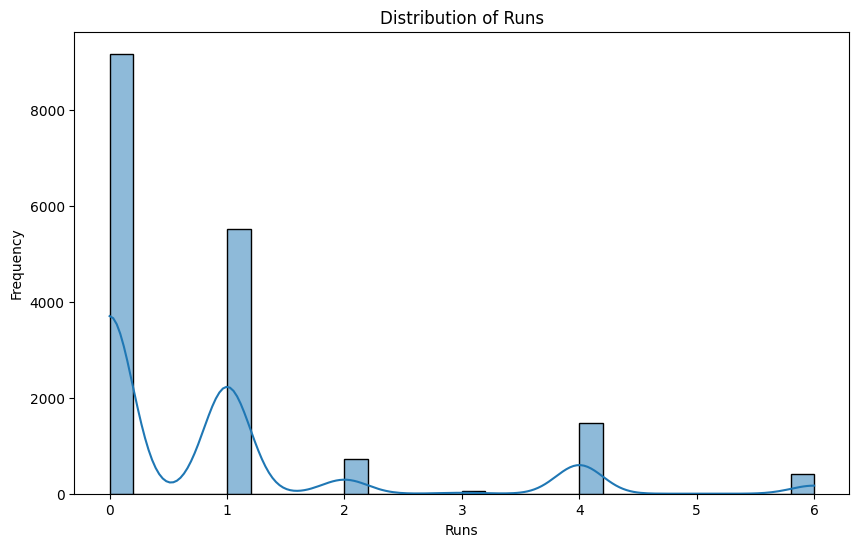

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualizing runs distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_D['runs_off_bat'], bins=30, kde=True)
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Visualize other relevant statistics
# Add more visualizations based on your requirements


<ipython-input-16-a8b93a5aab0b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_D.corr()


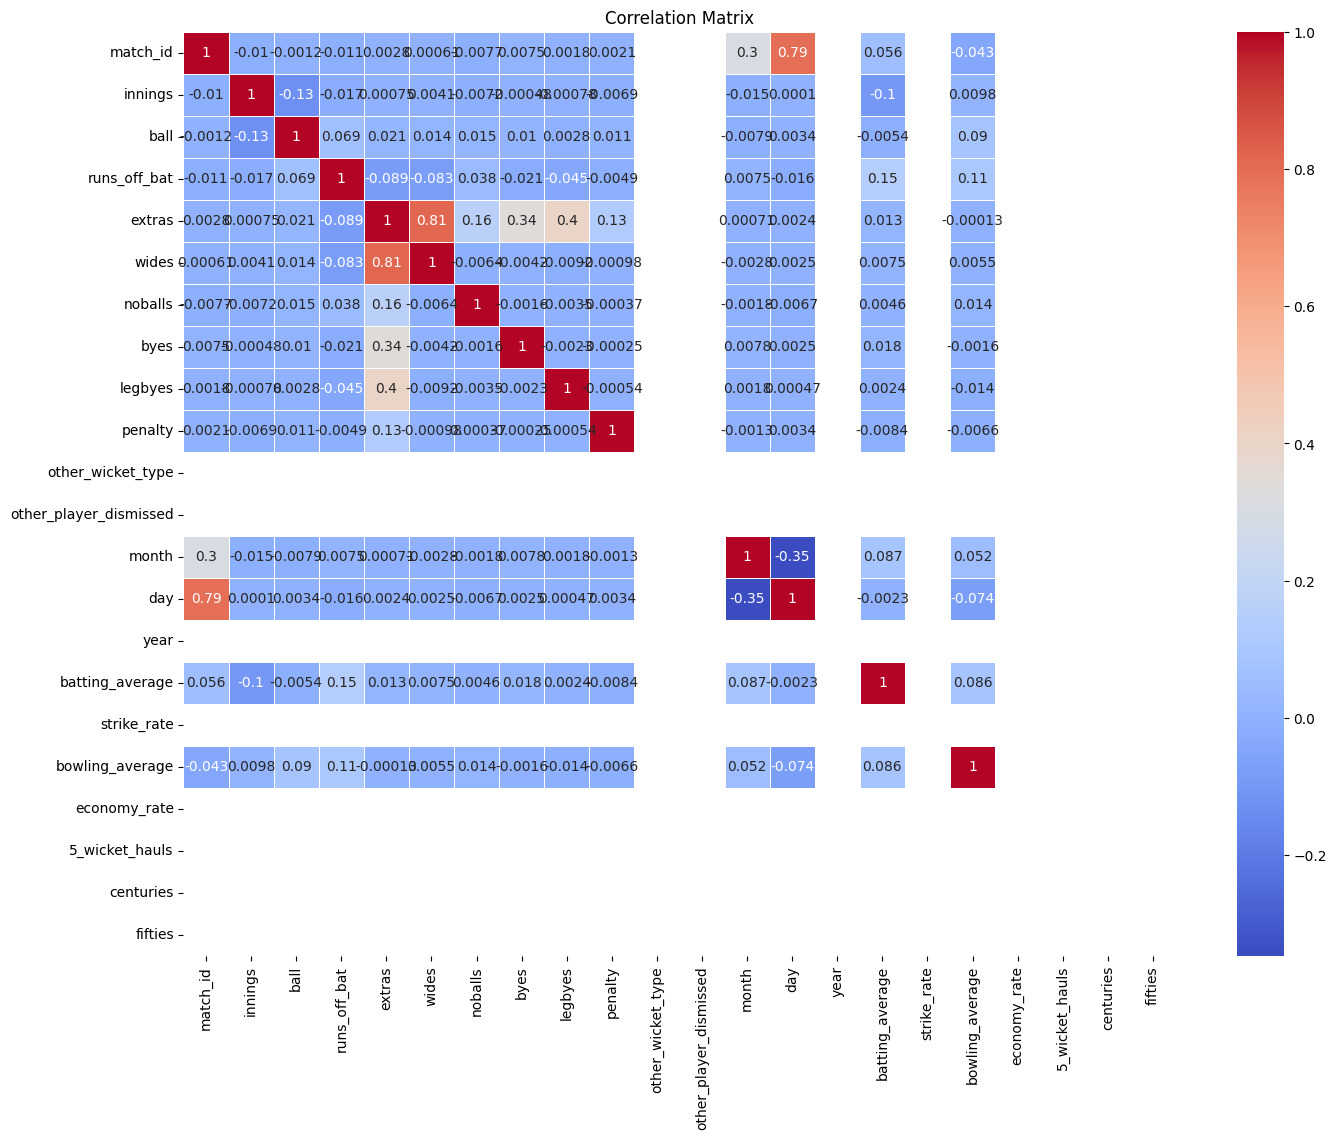

In [ ]:
# Example: Correlation matrix
correlation_matrix = df_D.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assume 'X' contains your independent variables and 'y' contains your dependent variable (runs_off_bat)
X = df_D[['batting_average', 'centuries', 'fifties', '5_wicket_hauls']]
y = df_D['runs_off_bat']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 2.1322684462711057


In [ ]:
# Define X_current with relevant features for the current matches
# Replace placeholder values with actual values from your data
# This is just an example; replace it with your actual data
X_current = df_D[['batting_average', 'centuries', 'fifties', '5_wicket_hauls']].head()

# Standardize features for the current data
X_current_scaled = scaler.transform(X_current)

# Predict outcomes for the current World Cup
current_predictions = model.predict(X_current_scaled)

# Display the predictions for the current matches
print("Predictions for the current matches:")
print(current_predictions)

# Assuming df_D is the original DataFrame
# Add the predicted values to the DataFrame
df_D['predicted_runs'] = model.predict(scaler.transform(df_D[['batting_average', 'strike_rate', 'centuries', 'fifties', '5_wicket_hauls']]))

# Display the modified DataFrame with predictions
print(df_D.head())


Predictions for the current matches:
[0.83225231 0.83225231 0.83225231 0.9971337  0.83225231]


ValueError: ignored